In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

5    109
2     87
4     51
1     28
3     22
0     20
Name: Cluster, dtype: int64


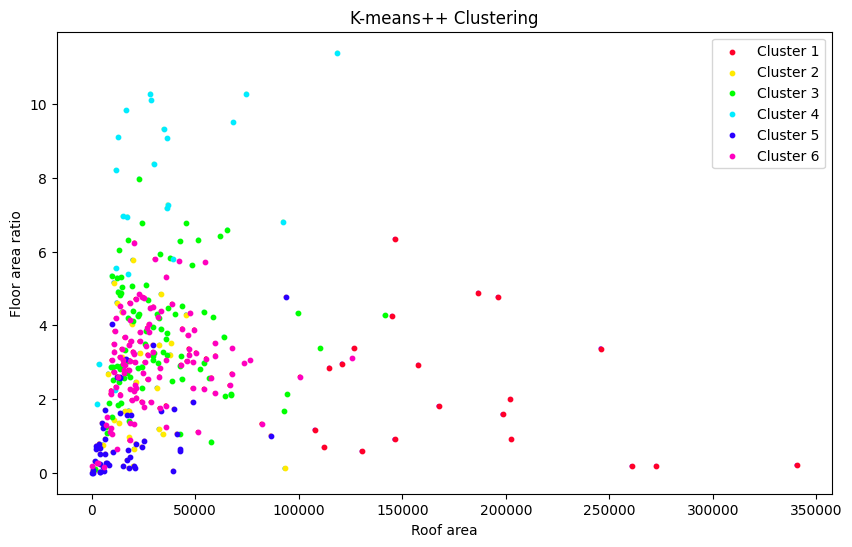

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('selected_columns_data.csv')

# 提取特征列
features = data.columns.tolist()

# 标准化数据
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# 进行K-means++聚类
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# 将聚类结果添加到数据中
data['Cluster'] = clusters

# 打印每个类别的样本数量
print(data['Cluster'].value_counts())

# 绘制聚类结果（仅绘制前两个特征）
plt.figure(figsize=(10, 6))
plt.scatter(data[features[2]], data[features[3]], c=clusters, cmap='rainbow',s= 5)
plt.xlabel(features[2])
plt.ylabel(features[3])
plt.title('K-means++ Clustering')

# 选择不同的颜色映射
colors = plt.cm.get_cmap('gist_rainbow', num_clusters)

# 循环遍历六种类别
for cluster_idx in range(num_clusters):
    plt.scatter(data[features[2]][data['Cluster'] == cluster_idx], 
                data[features[3]][data['Cluster'] == cluster_idx], 
                label=f'Cluster {cluster_idx + 1}', s=10, c=colors(cluster_idx))  # 使用颜色映射

plt.xlabel(features[2])
plt.ylabel(features[3])
plt.title('K-means++ Clustering')

# 显示图例
plt.legend()

plt.show()

In [20]:
data

,Average height,Footprint,Roof area,Floor area ratio,Building area,Number,OFF,RES,IND,OTH,Cluster
0,7.558442,0.213726,19056.189430,1.581319,140992.965300,77,82.764523,0.237438,0.000000,16.998039,4
1,12.805556,0.293953,46395.289440,3.726849,588217.119300,432,3.641184,91.713401,3.984771,0.660644,5
2,16.310924,0.265126,18643.522860,4.133545,290668.400300,119,4.201824,38.857269,33.652844,23.288062,5
3,6.356436,0.396095,21558.358120,2.034833,110750.288100,101,22.183850,77.816150,0.000000,0.000000,5
4,13.281623,0.155298,54186.984920,2.278871,795149.017800,419,2.665095,77.954880,8.447724,10.932302,5
...,...,...,...,...,...,...,...,...,...,...,...
312,10.660000,0.405871,36208.417590,3.786722,337819.993000,150,2.413842,24.999297,72.586861,0.000000,2
313,9.096774,0.442447,10557.657890,5.161403,123161.218500,31,0.000000,24.954008,35.214335,39.831657,1
314,10.057554,0.229558,21273.614910,2.462276,228184.436100,139,11.459819,59.005515,0.000000,29.534666,1
315,9.597510,0.367517,29555.251060,3.278432,263647.301600,241,33.181622,55.788101,0.000000,11.030276,5


#### 聚类后六个典型社区的形态参数，用以模拟逐时光伏和能源

In [36]:
data.to_excel('clustered_data.xlsx', index=False)  # 将数据导出为Excel文件

##### 建筑数量过少，未考虑整体的偏离程度

In [35]:
# 计算每个聚类的中心
cluster_centers = kmeans.cluster_centers_

# 选择每个聚类中与中心距离最小的数据点
selected_data = []
for cluster_id in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_id]
    distances = np.linalg.norm(cluster_data[features].values - cluster_centers[cluster_id], axis=1)
    closest_idx = np.argmin(distances)
    selected_data.append(cluster_data.iloc[closest_idx])

# 将选定的数据点组成一个新的DataFrame
selected_df = pd.DataFrame(selected_data, columns=data.columns)

# 将选定的数据点导出为CSV文件
selected_df.to_csv('typical_unit.csv', index=False)
selected_df

,Average height,Footprint,Roof area,Floor area ratio,Building area,Number,OFF,RES,IND,OTH,Cluster
219,9.625202,0.134116,107707.910700,1.166253,936611.453800,619.0,24.059593,54.837931,6.742899,14.359577,0.0
57,3.375000,0.021459,1460.860256,0.070092,4771.692051,8.0,0.000000,0.000000,0.000000,100.000000,1.0
203,6.000000,0.017722,1560.469264,0.106333,9362.815586,7.0,0.000000,0.000000,100.000000,0.000000,2.0
194,36.750000,0.040233,2726.169358,1.872303,126865.243500,4.0,0.000000,0.000000,100.000000,0.000000,3.0
208,6.000000,0.001084,157.660547,0.006504,945.963284,1.0,100.000000,0.000000,0.000000,0.000000,4.0
316,6.000000,0.028893,260.487432,0.173356,1562.924595,1.0,0.000000,100.000000,0.000000,0.000000,5.0


##### 选择每个聚类中多个特征上综合最接近中心的数据点

In [38]:
# 选择每个聚类中多个特征上综合最接近中心的数据点
num_features = len(features)
selected_data = []

for cluster_id in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_id]
    
    # 计算每个数据点在多个特征上与聚类中心的差异
    feature_deviations = np.linalg.norm(cluster_data[features].values - cluster_centers[cluster_id], axis=1)
    
    # 使用欧氏距离衡量整体偏离程度
    combined_distances = np.sqrt(np.sum(feature_deviations**2))
    
    closest_idx = np.argmin(combined_distances)
    selected_data.append(cluster_data.iloc[closest_idx])

# 将选定的数据点组成一个新的DataFrame
selected_df = pd.DataFrame(selected_data, columns=data.columns)

# 将选定的数据点导出为CSV文件
selected_df.to_csv('typical_unit.csv', index=False)

selected_df


,Average height,Footprint,Roof area,Floor area ratio,Building area,Number,OFF,RES,IND,OTH,Cluster
5,10.909091,0.197174,202239.20120,1.998721,2.050100e+06,1177.0,23.294289,39.909588,5.759907,31.036217,0.0
8,7.051793,0.016650,93180.15214,0.117903,6.598134e+05,502.0,30.172465,23.400985,0.450657,45.975893,1.0
6,13.388060,0.367417,19477.53425,5.072184,2.688870e+05,67.0,9.443528,0.000000,90.556472,0.000000,2.0
22,26.500000,0.333014,36428.15907,9.076837,9.929075e+05,36.0,88.131410,0.000000,11.868590,0.000000,3.0
0,7.558442,0.213726,19056.18943,1.581319,1.409930e+05,77.0,82.764523,0.237438,0.000000,16.998039,4.0
1,12.805556,0.293953,46395.28944,3.726849,5.882171e+05,432.0,3.641184,91.713401,3.984771,0.660644,5.0


#### 六个聚类的分布及特点

In [13]:
# 归一化处理
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 读取CSV文件
data = pd.read_csv('selected_columns_data.csv')

# 提取特征列
features = data.columns.tolist()

# 标准化数据
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# 将标准化后的数据转换回DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=features)

# 将标准化后的数据保存为CSV文件
normalized_df.to_csv('normalized_selected_columns_data.csv', index=False)

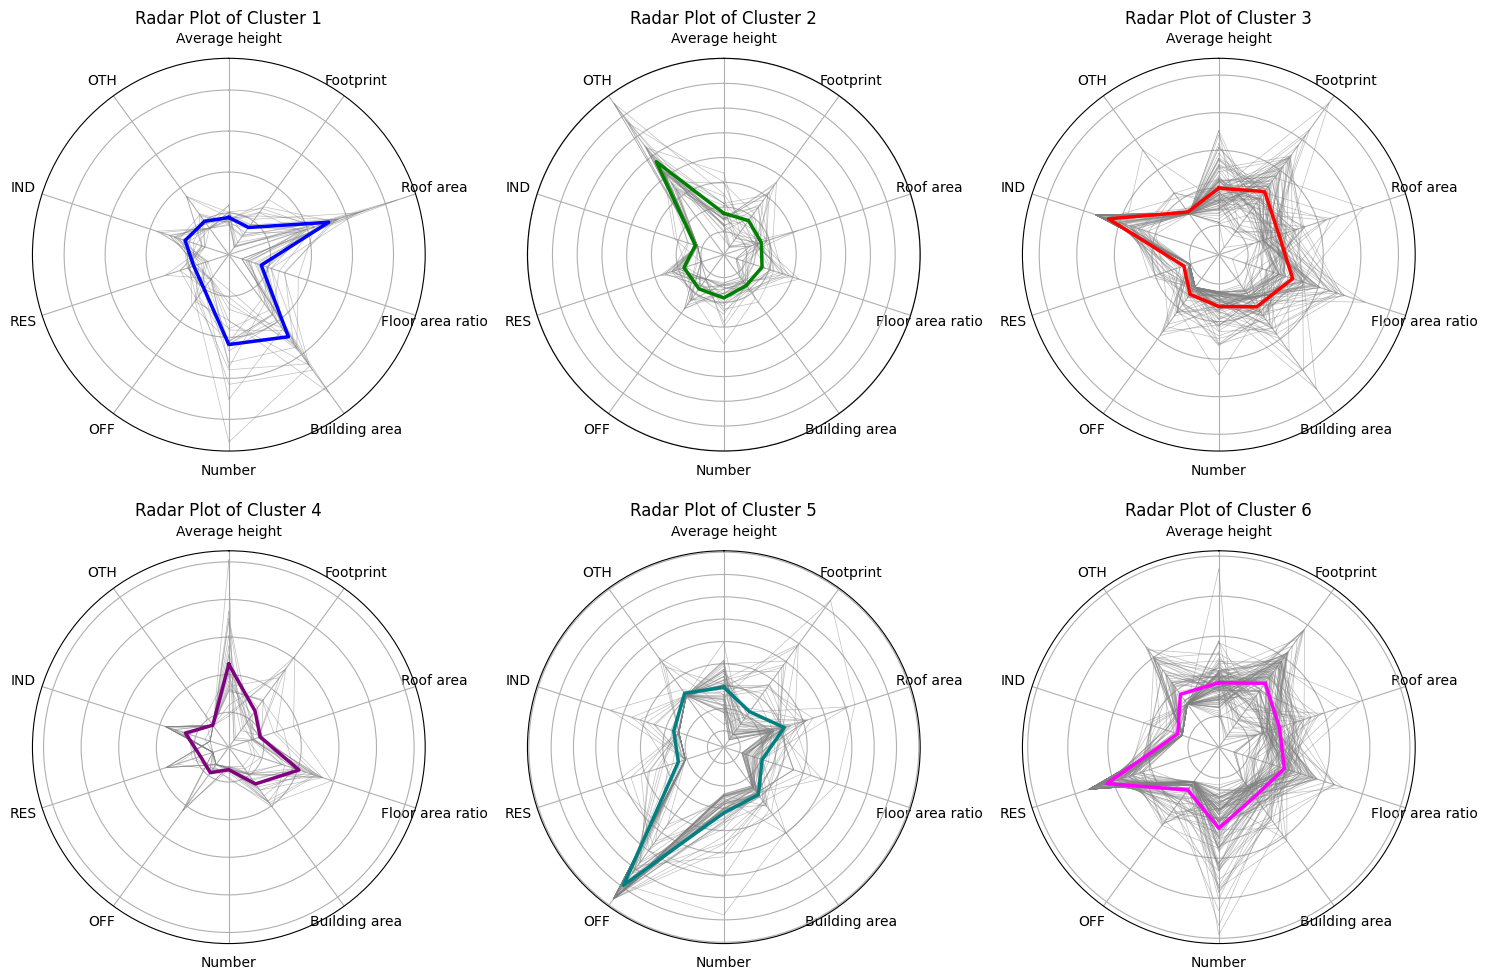

In [54]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('normalized_selected_columns_data.csv')

# 提取特征列
features = data.columns.tolist()

# 标准化数据
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# 进行K-means++聚类
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# 将聚类结果添加到数据中
data['Cluster'] = clusters

# 创建子图布局
fig, axes = plt.subplots(2, 3, figsize=(15, 10), subplot_kw={'polar': True})
axes = axes.flatten()

# 修改颜色顺序
color_sequence = ['blue', 'green', 'red', 'purple', 'teal', 'magenta']

# 绘制雷达图
categories = features
num_categories = len(categories)
theta = np.linspace(0, 2*np.pi, num_categories, endpoint=False)
theta = np.concatenate((theta, [theta[0]]))  # 闭合路径

for cluster_idx, ax in enumerate(axes):
    cluster_data = data[data['Cluster'] == cluster_idx]
    
    # 绘制数据（都用灰色）在同一个雷达图上
    for _, row in cluster_data.iterrows():
        values = row[features].values
        values = np.concatenate((values, [values[0]]))
        color = 'gray'
        label = 'Data'
        ax.plot(theta, values, alpha=0.5, color=color, label=label, linewidth=0.5)

    # 绘制平均数据
    selected_data = normalized_data[data['Cluster'] == cluster_idx]
    average_data = selected_data.mean(axis=0)
    values = average_data
    values = np.concatenate((values, [values[0]]))
    
    color = color_sequence[cluster_idx]
    ax.plot(theta, values, color=color, label=f'Cluster {cluster_idx}', linewidth=2.5)

    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)
    ax.set_xticks(theta[:-1])
    ax.set_xticklabels(categories)
    ax.set_yticklabels([])
    
    ax.set_title(f'Radar Plot of Cluster {cluster_idx + 1}')

# 调整子图布局
plt.tight_layout()
plt.show()


#### 用遮挡率验证聚类结果，并且引出能量、经济、环境的关联讨论